In [65]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Polygon

### A simple triangle

In [23]:
df1 = gpd.GeoDataFrame({'attribute': [5],
                        'geometry': [Polygon([(0, 0), (1, 1), (1, 0)])]
                       })
df1

,attribute,geometry
0,5,"POLYGON ((0.00000 0.00000, 1.00000 1.00000, 1...."


### A simple square

In [24]:
df2 = gpd.GeoDataFrame({'attribute': [10],
                        'geometry': [Polygon([(.4, .4), (1.4, .4), (1.4, 1.4), (.4, 1.4)])]
                       })
df2

,attribute,geometry
0,10,"POLYGON ((0.40000 0.40000, 1.40000 0.40000, 1...."


### A simple triangle, contained entirely within the first triangle

In [25]:
df3 = gpd.GeoDataFrame({'attribute': [15],
                        'geometry': [Polygon([(.25, .25), (.75, .75), (.75, .25)])]
                       })
df3

,attribute,geometry
0,15,"POLYGON ((0.25000 0.25000, 0.75000 0.75000, 0...."


### Plot of first triangle and square
The overlapping part is what I expect would be returned from an sjoin with op='intersects'

<Figure size 432x288 with 0 Axes>

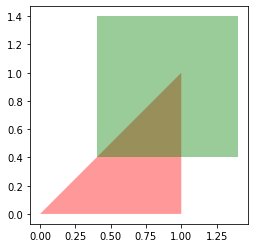

In [53]:
fig = plt.figure()
ax = df1.plot(alpha=.4,color='red')
df2.plot(ax=ax,alpha=.4,color='green')

### Plot of the two triangles
The overlapping part is what I expect would be returned from an sjoin with op='intersects', 'contains', or 'within' (the last two depending on how='left' or 'right', I believe respectively)

<Figure size 432x288 with 0 Axes>

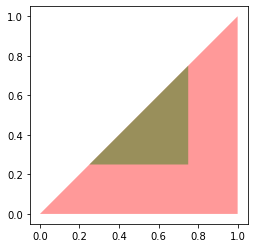

In [26]:
fig = plt.figure()
ax = df1.plot(alpha=.4,color='red')
df3.plot(ax=ax,alpha=.4,color='green')

### Plot of sjoin of first triangle and square--seems to return the entire first shape, and not the intersection of the two shapes...?
Switching how='left' to 'right' yields the square.

Switching op='intersects' to 'contains' or 'within' results in a dataframe with NaNs for the right index/attribute.

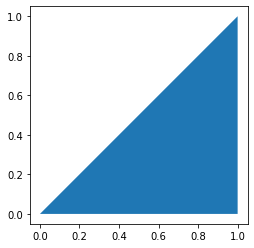

In [63]:
joined = gpd.sjoin(df1,df2,
                   op='intersects',
                   how='left')
joined.plot()

In [64]:
joined

,attribute_left,geometry,index_right,attribute_right
0,5,"POLYGON ((0.00000 0.00000, 1.00000 1.00000, 1....",0,10


This is obviously not how I thought it worked, but I suppose I get it now--"intersects", not "intersection". 

### If I use Geopandas' .intersection() method with the first triangle and square, I get what I expect: just the overlapping part of the polygons.

In [50]:
df1df2_intersection = gpd.GeoDataFrame()
df1df2_intersection['geometry'] = gpd.GeoSeries(df1.loc[0,'geometry'].intersection(df2.loc[0,'geometry']))
type(df1df2_intersection)

geopandas.geodataframe.GeoDataFrame

<Figure size 432x288 with 0 Axes>

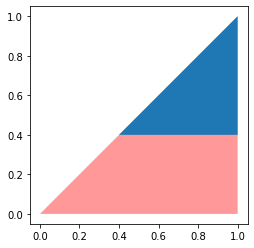

In [55]:
fig = plt.figure()
ax = df1.plot(alpha=.4,color='red')
df1df2_intersection.plot(ax=ax)

### So the answer seems to be that I need to rewrite my code to return the results of an .intersection(), instead of simply performing an sjoin...?